In [139]:
import pandas as pd

data = pd.read_csv('Pytorch_Community_Scraped_Data_7059posts_new.csv')
data

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,0,About the FAQ category,FAQ,[],The FAQ category contains commonly-asked quest...,[],0,0,0,0
1,1,Vscode debug from python step into c++,FAQ,[],I am using vscode to debug pytorch internals i...,[],0,0,0,0
2,2,Why are my tensor’s gradients unexpectedly Non...,FAQ,[],tl;dr\nEnsure that\n\ntensor.is_leaf == True\n...,[],0,0,0,0
3,3,How to measure execution time in PyTorch?,FAQ,[],tl;dr\nThe recommended profiling methods are:\...,[],0,0,0,0
4,4,Time/Memory keeps increasing at every iteration,FAQ,[],How are you measuring time?\nIf each new itera...,[],0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7055,7055,RuntimeError due to inplace operation,autograd,[],I’m still trying to wrap my head around PyTorc...,"['The error you had before the present one, na...",2/22/2021 7:12,3,118,5
7056,7056,Gradient of FC with respect to each sample in ...,autograd,[],I want to get gradient of FC layer of network ...,['autograd automatically condenses the gradien...,2/26/2021 13:02,0,75,1
7057,7057,The second order derivative of a function with...,autograd,[],"Hi,\nI have a question about the second order ...","['Hi,\nThe problem is that your function is li...",2/25/2021 23:24,2,100,3
7058,7058,.grad attribute of a non-leaf tensor being acc...,autograd,[],"Hi there, im a newbie at pytorch.\nI am runnin...","['Hi,\nThis warning only means that you are ac...",5/21/2020 8:42,9,6.7k,9


In [140]:
data.columns

Index(['Unnamed: 0', 'Topic Title', 'Category', 'Tags', 'Leading Post',
       'Post Replies', 'Created_at', 'Likes', 'Views', 'Replies'],
      dtype='object')

In [141]:
data.drop(columns= ['Unnamed: 0', 'Tags'], inplace=True)

In [142]:
data.head()

,Topic Title,Category,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,About the FAQ category,FAQ,The FAQ category contains commonly-asked quest...,[],0,0,0,0
1,Vscode debug from python step into c++,FAQ,I am using vscode to debug pytorch internals i...,[],0,0,0,0
2,Why are my tensor’s gradients unexpectedly Non...,FAQ,tl;dr\nEnsure that\n\ntensor.is_leaf == True\n...,[],0,0,0,0
3,How to measure execution time in PyTorch?,FAQ,tl;dr\nThe recommended profiling methods are:\...,[],0,0,0,0
4,Time/Memory keeps increasing at every iteration,FAQ,How are you measuring time?\nIf each new itera...,[],0,0,0,0


In [143]:
#Explore the data===========================================================
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [144]:
df = data.copy()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Topic Title   7045 non-null   object
 1   Category      7045 non-null   object
 2   Leading Post  7044 non-null   object
 3   Post Replies  7045 non-null   object
 4   Created_at    7025 non-null   object
 5   Likes         7025 non-null   object
 6   Views         7024 non-null   object
 7   Replies       7024 non-null   object
dtypes: object(8)
memory usage: 441.4+ KB


In [146]:
df['post'] = df['Topic Title'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies']

In [147]:
df['post'].head()

0    About the FAQ category The FAQ category contai...
1    Vscode debug from python step into c++ I am us...
2    Why are my tensor’s gradients unexpectedly Non...
3    How to measure execution time in PyTorch? tl;d...
4    Time/Memory keeps increasing at every iteratio...
Name: post, dtype: object

In [148]:
df['post'][1]
df = df[df['post'].notnull()]
df['post'].apply(lambda x: len(x.split(' '))).sum()

4125303

In [149]:
df['Category'].unique()

array(['FAQ', 'Memory Format', 'xla', 'FX (Functional Transformations)',
       'audio', 'Opacus', 'mixed-precision', 'windows', 'glow',
       'projects', 'Captum', 'complex', 'tensorboard', 'Mac OS X',
       'Site Feedback', 'jobs', 'ignite', 'hackathon', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd'], dtype=object)

Text(0, 0.5, 'no of posts')

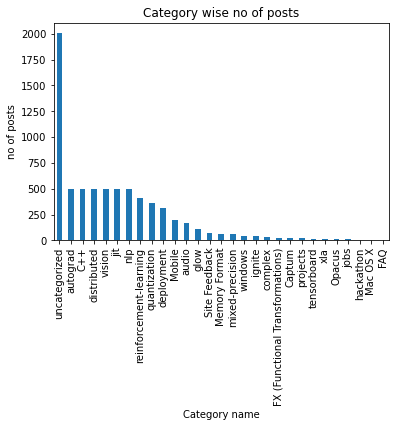

In [179]:
my_categories = ['Memory Format', 'xla', 'FX (Functional Transformations)',
       'audio', 'Opacus', 'mixed-precision', 'windows', 'glow',
       'projects', 'Captum', 'complex', 'tensorboard', 'Mac OS X',
       'Site Feedback', 'jobs', 'ignite', 'hackathon', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd']


df['Category'].value_counts().plot.bar()
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

<AxesSubplot:ylabel='Category'>

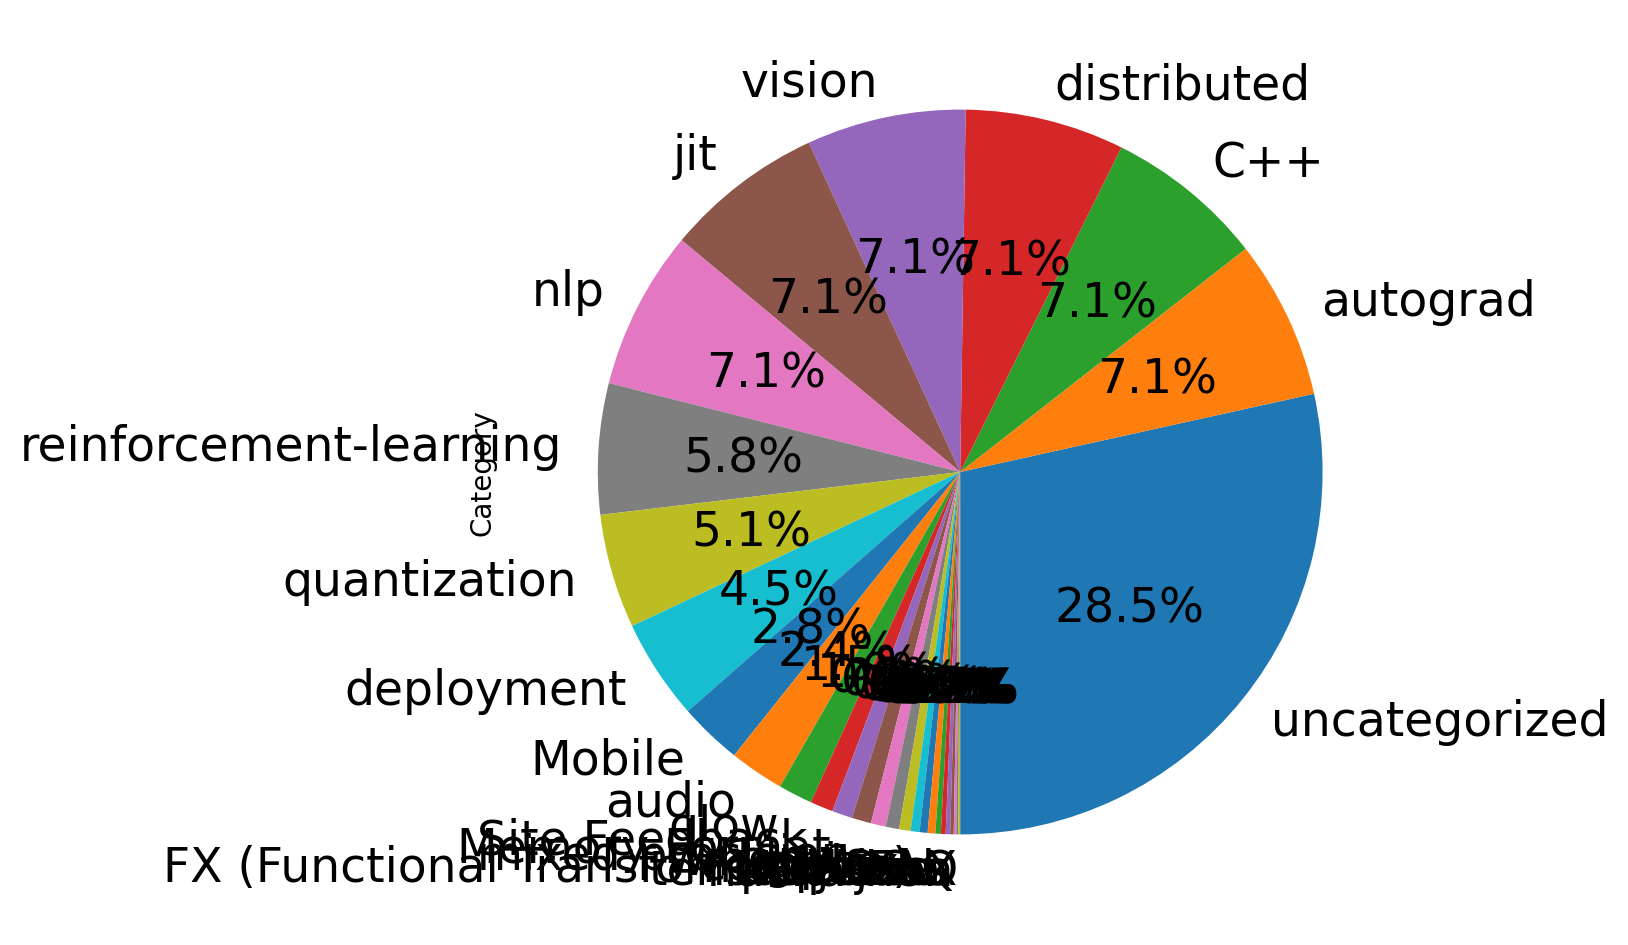

In [180]:
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.subplot(111)

df['Category'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

In [181]:
def print_plot(index):
    example = df[df.index == index][['post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
print_plot(10)

Help locating my memory leak Hi All,
I am very new to PyTorch and I’m seeing something weird when my code runs that I can’t figure out.
In short this I am applying a gaussian to many images and then a regression with brain data.
The code batches the gaussian/image process. The center location and width of the gaussian changes, each combination is considered one ‘model’ and we find the combination that provides the best prediction for the brain data. I use nvtop to monitor the GPU usage. I’m trying to find the best batch number for both images and brain data so that I can model a whole brain without it taking days and days.
So I call my function, I watch the gpu and it starts the first model, I can see the memory shoot up when it starts the image batching, which makes sense. But when the second model runs, it shoots up again, as if PyTorch is allocating a new set of memory and I’m not sure why it would. Even weirder is it only does this on the second model, it doesn’t keep going up for 

In [182]:
#Text Pre-processing========================================================
test_df = df.copy()

In [183]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    return text

In [184]:
test_df['post'] = test_df['post'].apply(lambda x: clean_text(str(x)))

In [185]:
def test_print_plot(index):
    example = test_df[test_df.index == index][['post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
test_print_plot(10)

help locating my memory leak hi all 
i am very new to pytorch and i m seeing something weird when my code runs that i can t figure out.
in short this i am applying a gaussian to many images and then a regression with brain data.
the code batches the gaussian image process. the center location and width of the gaussian changes  each combination is considered one ‘model  and we find the combination that provides the best prediction for the brain data. i use nvtop to monitor the gpu usage. i m trying to find the best batch number for both images and brain data so that i can model a whole brain without it taking days and days.
so i call my function  i watch the gpu and it starts the first model  i can see the memory shoot up when it starts the image batching  which makes sense. but when the second model runs  it shoots up again  as if pytorch is allocating a new set of memory and i m not sure why it would. even weirder is it only does this on the second model  it doesn t keep going up for 

In [186]:
test_df['post'].apply(lambda x: len(x.split(' '))).sum()

5202914

In [187]:
5202914 - 4125303

1077611

In [188]:
#MODELING THE DATA===========================================================

X = test_df['post']
y = test_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [189]:
X_train

1710    prepare data for bi-lstm text classifier i wan...
1105    what does the at::gt_out function do? i came a...
3906    local inference of saved pytorch models i am i...
4267    typeerror: ‘tuple  object is not callable clas...
2918    help with computing gradients wrt output itsel...
                              ...                        
3787    tutuorials about how to design the models able...
5207    how to add an additional layer on top of a pre...
5242    how cross entropy loss is calculated? output w...
5406    how do i load only the weights of the hidden s...
870     internal assert failed at  .. aten src aten co...
Name: post, Length: 4930, dtype: object

In [190]:
y_train

1710                       nlp
1105                       C++
3906                deployment
4267             uncategorized
2918    reinforcement-learning
                 ...          
3787                deployment
5207             uncategorized
5242             uncategorized
5406             uncategorized
870                        C++
Name: Category, Length: 4930, dtype: object

In [191]:
#Naive Bayes Classifier for Multinomials Models==============================
#CountVectorizer + TF-IDF Transformer + MultinomialNB
# TF-IDF = Term Frequency — Inverse Document Frequency

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.2781456953642384
                                 precision    recall  f1-score   support

                  Memory Format       0.00      0.00      0.00       146
                            xla       0.00      0.00      0.00        11
FX (Functional Transformations)       0.00      0.00      0.00        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.00      0.00      0.00        22
                mixed-precision       0.00      0.00      0.00        68
                        windows       0.00      0.00      0.00         7
                           glow       0.00      0.00      0.00        18
                       projects       0.00      0.00      0.00        51
                         Captum       0.00      0.00      0.00       150
                        complex       0.00      0.00      0.00        10
                    tensorboard       0.00      0.00      0.00        98
                      

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
#LINEAR SUPPORT VECTOR MACHINE================================================
#CountVectorizer + TF-IDFTransformer + SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1321 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6385998107852412
                                 precision    recall  f1-score   support

                  Memory Format       0.68      0.79      0.73       146
                            xla       1.00      0.73      0.84        11
FX (Functional Transformations)       0.90      0.64      0.75        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.00      0.00      0.00        22
                mixed-precision       0.81      0.74      0.77        68
                        windows       1.00      0.86      0.92         7
                           glow       0.71      0.28      0.40        18
                       projects       0.78      0.57      0.66        51
                         Captum       0.56      0.67      0.61       150
                        complex       1.00      0.10      0.18        10
                    tensorboard       0.59      0.17      0.27        98
                      

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [193]:
#Logistic Regression==========================================================
#CountVectorizer + TF-IDFTransformer + Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1331 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.6073793755912961
                                 precision    recall  f1-score   support

                  Memory Format       0.68      0.73      0.70       146
                            xla       1.00      0.45      0.62        11
FX (Functional Transformations)       0.88      0.50      0.64        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.46      0.27      0.34        22
                mixed-precision       0.82      0.72      0.77        68
                        windows       1.00      0.71      0.83         7
                           glow       0.67      0.33      0.44        18
                       projects       0.85      0.55      0.67        51
                         Captum       0.55      0.52      0.53       150
                        complex       0.29      0.20      0.24        10
                    tensorboard       0.38      0.29      0.33        98
                      

In [195]:
#Decision Tree================================================================
#CountVectorizer + TF-IDFTransformer + DecisionTreeClassifier

my_categories_1 = ['FAQ','Memory Format', 'xla', 'FX (Functional Transformations)',
       'audio', 'Opacus', 'mixed-precision', 'windows', 'glow',
       'projects', 'Captum', 'complex', 'tensorboard', 'Mac OS X',
       'Site Feedback', 'jobs', 'ignite', 'hackathon', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd']

from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(X_train, y_train)

y_pred = dtree.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories_1))

accuracy 0.48864711447492903
                                 precision    recall  f1-score   support

                            FAQ       0.60      0.66      0.63       146
                  Memory Format       0.60      0.27      0.37        11
                            xla       0.00      0.00      0.00         0
FX (Functional Transformations)       0.64      0.50      0.56        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.00      0.00      0.00        22
                mixed-precision       0.74      0.66      0.70        68
                        windows       0.00      0.00      0.00         7
                           glow       0.05      0.06      0.05        18
                       projects       0.56      0.53      0.55        51
                         Captum       0.38      0.44      0.41       150
                        complex       0.29      0.20      0.24        10
                    t

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [196]:
#RESULT========================================================================
#Results of the previously trained models

import pandas as pd

results = pd.DataFrame({'Model': ['Naive Bayes MultinomialNB', 'Linear SVM', 'Logistic Regression', 'Decision Tree'],
                         'Accuracy': [res1311, res1321, res1331, res1341]})
results.set_index('Model')
results.sort_values(by='Accuracy')

,Model,Accuracy
0,Naive Bayes MultinomialNB,0.278146
3,Decision Tree,0.488647
2,Logistic Regression,0.607379
1,Linear SVM,0.638600


In [197]:
#Cross Validation with linear SVM=============================================

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
cv_res_sgd = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd = np.mean(cv_res_sgd)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [198]:
print(mean_cv_res_sgd)

0.6444219066937119


In [199]:
# Strategy 2 ================================================================
# Remove stop words (+ what was done in Strategy 1)

In [200]:
test_df2 = test_df.copy()

In [201]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [202]:
test_df2['post'] = test_df2['post'].apply(clean_text)

In [203]:
def test_print_plot(index):
    example = test_df2[test_df2.index == index][['post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
test_print_plot(10)

help locating memory leak hi new pytorch seeing something weird code runs figure out. short applying gaussian many images regression brain data. code batches gaussian image process. center location width gaussian changes combination considered one ‘model find combination provides best prediction brain data. use nvtop monitor gpu usage. trying find best batch number images brain data model whole brain without taking days days. call function watch gpu starts first model see memory shoot starts image batching makes sense. second model runs shoots pytorch allocating new set memory sure would. even weirder second model keep going model. every model would assume creating unnecessary new tensor something code first second loop really puzzling me. tried stopping code various places looking tensors created find culprit nothing new second run. code mostly written someone else changed aspects ‘optimize it. sure things done moment figuring memory thing important severely limits batch sizes use. al

In [204]:
#Modeling the data=============================================================
X = test_df2.post
y = test_df2.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [205]:
X_train

1710    prepare data bi-lstm text classifier want buil...
1105    at::gt_out function do? came accross function ...
3906    local inference saved pytorch models intereste...
4267    typeerror: ‘tuple object callable class datase...
2918    help computing gradients wrt output obtaining ...
                              ...                        
3787    tutuorials design models able export tutorials...
5207    add additional layer top pretrained model? app...
5242    cross entropy loss calculated? output 4 classe...
5406    load weights hidden state lstm another lstm tr...
870     internal assert failed .. aten src aten core j...
Name: post, Length: 4930, dtype: object

In [206]:
y_train

1710                       nlp
1105                       C++
3906                deployment
4267             uncategorized
2918    reinforcement-learning
                 ...          
3787                deployment
5207             uncategorized
5242             uncategorized
5406             uncategorized
870                        C++
Name: Category, Length: 4930, dtype: object

In [207]:
#Naive Bayes Classifier for Multinomial Models
#CountVectorizer + TF-IDFTransformer + MultinomialNB


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.28240302743614004
                                 precision    recall  f1-score   support

                  Memory Format       1.00      0.01      0.03       146
                            xla       0.00      0.00      0.00        11
FX (Functional Transformations)       0.00      0.00      0.00        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.00      0.00      0.00        22
                mixed-precision       0.00      0.00      0.00        68
                        windows       0.00      0.00      0.00         7
                           glow       0.00      0.00      0.00        18
                       projects       0.00      0.00      0.00        51
                         Captum       0.00      0.00      0.00       150
                        complex       0.00      0.00      0.00        10
                    tensorboard       0.00      0.00      0.00        98
                     

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
#Linear Support Vector Machine
#CountVectorizer + TF-IDFTransformer + SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2321 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6381267738883633
                                 precision    recall  f1-score   support

                  Memory Format       0.67      0.81      0.74       146
                            xla       1.00      0.64      0.78        11
FX (Functional Transformations)       0.89      0.57      0.70        14
                          audio       0.00      0.00      0.00         1
                         Opacus       1.00      0.09      0.17        22
                mixed-precision       0.79      0.72      0.75        68
                        windows       1.00      0.71      0.83         7
                           glow       0.62      0.28      0.38        18
                       projects       0.80      0.55      0.65        51
                         Captum       0.56      0.66      0.60       150
                        complex       1.00      0.10      0.18        10
                    tensorboard       0.55      0.16      0.25        98
                      

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
#Logistic Regression
#CountVectorizer + TF-IDFTransformer + Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2331 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.6050141911069064
                                 precision    recall  f1-score   support

                  Memory Format       0.68      0.73      0.70       146
                            xla       1.00      0.45      0.62        11
FX (Functional Transformations)       0.86      0.43      0.57        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.36      0.18      0.24        22
                mixed-precision       0.78      0.72      0.75        68
                        windows       1.00      0.29      0.44         7
                           glow       0.86      0.33      0.48        18
                       projects       0.90      0.55      0.68        51
                         Captum       0.54      0.53      0.54       150
                        complex       0.20      0.10      0.13        10
                    tensorboard       0.33      0.23      0.27        98
                      

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
#Decision Tree
#CountVectorizer + TF-IDFTransformer + DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(X_train, y_train)

y_pred = dtree.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories_1))

accuracy 0.48628192999053926
                                 precision    recall  f1-score   support

                            FAQ       0.55      0.59      0.57       146
                  Memory Format       0.00      0.00      0.00        11
                            xla       0.00      0.00      0.00         0
FX (Functional Transformations)       0.57      0.57      0.57        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.00      0.00      0.00        22
                mixed-precision       0.77      0.68      0.72        68
                        windows       1.00      0.14      0.25         7
                           glow       0.15      0.17      0.16        18
                       projects       0.46      0.49      0.48        51
                         Captum       0.40      0.49      0.44       150
                        complex       0.00      0.00      0.00        10
                    t

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


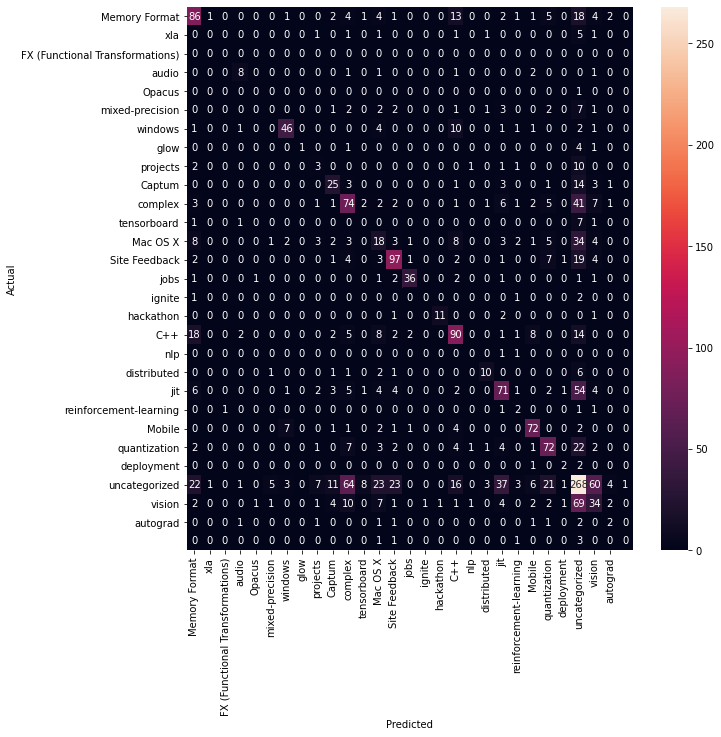

In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [214]:
#Results
#Results of the previously trained models
import pandas as pd

results = pd.DataFrame({'Model': ['Naive Bayes MultinomialNB', 'Linear SVM', 'Logistic Regression', 'Decision Tree'],
                         'Accuracy': [res2311, res2321, res2331, res2341]})
results.set_index('Model')
results.sort_values(by='Accuracy')

,Model,Accuracy
0,Naive Bayes MultinomialNB,0.282403
3,Decision Tree,0.486282
2,Logistic Regression,0.605014
1,Linear SVM,0.638127


In [215]:
#Cross Validation with linear SVM

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
cv_res_sgd2 = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd2 = np.mean(cv_res_sgd2)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [216]:
print(mean_cv_res_sgd2)

0.6419878296146044


In [218]:
#Strategy 3
#text.replace(r'\n', ' ') (+ what was done in Strategy 2)

In [219]:
test_df3 = test_df2.copy()

In [220]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = text.replace(r'\n', ' ')
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
test_df3['post'] = test_df3['post'].apply(clean_text)

In [221]:
def test_print_plot(index):
    example = test_df3[test_df3.index == index][['post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
test_print_plot(10)

help locating memory leak hi new pytorch seeing something weird code runs figure out. short applying gaussian many images regression brain data. code batches gaussian image process. center location width gaussian changes combination considered one ‘model find combination provides best prediction brain data. use nvtop monitor gpu usage. trying find best batch number images brain data model whole brain without taking days days. call function watch gpu starts first model see memory shoot starts image batching makes sense. second model runs shoots pytorch allocating new set memory sure would. even weirder second model keep going model. every model would assume creating unnecessary new tensor something code first second loop really puzzling me. tried stopping code various places looking tensors created find culprit nothing new second run. code mostly written someone else changed aspects ‘optimize it. sure things done moment figuring memory thing important severely limits batch sizes use. al

In [222]:
#Cross Validation with linear SVM
X = test_df3.post
y = test_df3.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [223]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
cv_res_sgd3 = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd3 = np.mean(cv_res_sgd3)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [224]:
print(mean_cv_res_sgd3)

0.6419878296146045


In [225]:
#Random Forest===============================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=500, max_depth=500, random_state=0)),
               ])

cv_res_rf = cross_val_score(rf, X_train, y_train, cv=10)
mean_cv_res_rf = np.mean(cv_res_rf)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [232]:
print(mean_cv_res_rf)#max_depth = 10, n_estimators=300

0.5580121703853956


In [233]:
print(mean_cv_res_rf)# max_depth = 100, n_estimators=300

0.5580121703853956


In [234]:
print(mean_cv_res_rf)# max_depth = 500, n_estimators=300

0.5580121703853956


In [235]:
##### BEST #####
print(mean_cv_res_rf)# max_depth = 500, n_estimators=400 
##### BEST #####

0.5580121703853956


In [236]:
print(mean_cv_res_rf)# max_depth = 1000, n_estimators=400

0.5580121703853956


In [237]:
print(mean_cv_res_rf)# max_depth = 500, n_estimators=500

0.5580121703853956


In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=200, max_depth=100, random_state=0)),
               ])

cv_res_rf_tfidf = cross_val_score(rf, X_train, y_train, cv=10)
mean_cv_res_rf_tfidf = np.mean(cv_res_rf_tfidf)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [239]:
mean_cv_res_rf_tfidf# max_depth = 500, n_estimators=500

0.5519269776876268

In [240]:
mean_cv_res_rf_tfidf # n_estimators=200, max_depth=100

0.5519269776876268

In [241]:
#Using TF-IDF as a vectorizer and transformer is slighly better than using CountVectorizer as a Vectorizer.
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)),
               ])
cv_res_sgd_tfidf = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd_tfidf = np.mean(cv_res_sgd_tfidf)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [242]:
mean_cv_res_sgd_tfidf #10 in max_iter

0.6444219066937119

In [243]:
mean_cv_res_sgd_tfidf# 100 in max_iter

0.6444219066937119

In [244]:
!pip install xgboost

In [245]:
import xgboost as xgb

xgb = Pipeline(steps=[('vect', TfidfVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

cv_res_xgb_tfidf = cross_val_score(xgb, X_train, y_train, cv=10)
mean_cv_res_xgb_tfidf = np.mean(cv_res_xgb_tfidf)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [246]:
mean_cv_res_xgb_tfidf

0.6127789046653144

In [247]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

C:\Users\mandy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [254]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
res_xgb = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6215704824976348
                                 precision    recall  f1-score   support

                  Memory Format       0.72      0.66      0.69       146
                            xla       1.00      0.73      0.84        11
FX (Functional Transformations)       0.90      0.64      0.75        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.50      0.05      0.08        22
                mixed-precision       0.80      0.72      0.76        68
                        windows       1.00      0.57      0.73         7
                           glow       0.60      0.17      0.26        18
                       projects       0.85      0.57      0.68        51
                         Captum       0.55      0.51      0.53       150
                        complex       0.67      0.20      0.31        10
                    tensorboard       0.48      0.13      0.21        98
                      

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


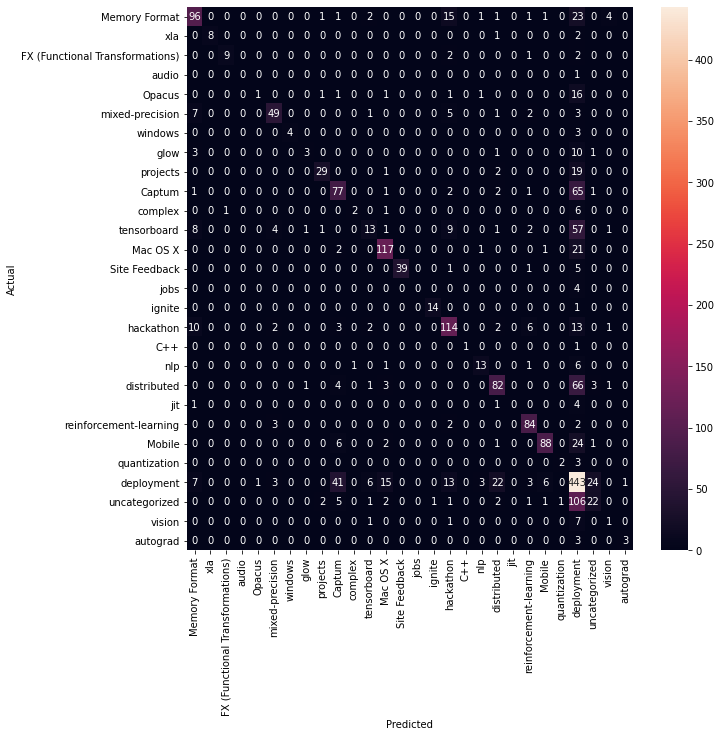

In [255]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [253]:
!pip install lightgbm

In [256]:
import lightgbm as lgbm

tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_data_tfidf = tfidf_vec.fit_transform(test_df3['post'])
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', verbose=-1, learning_rate=0.5, max_depth=20, num_leaves=50, n_estimators=120, max_bin=2000,)
clf_LGBM.fit(X_train_tfidf, y_train, verbose=-1)
predicted_LGBM = clf_LGBM.predict(X_test_tfidf)

In [257]:
cv_res_lgbm_tfidf = cross_val_score(clf_LGBM, X_train_tfidf, y_train, cv=10)
mean_cv_res_lgbm_tfidf = np.mean(cv_res_lgbm_tfidf)

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [258]:
mean_cv_res_lgbm_tfidf

0.19290060851926977

In [259]:
print('accuracy %s' % accuracy_score(predicted_LGBM, y_test))
res_lgbm = accuracy_score(predicted_LGBM, y_test)
print(classification_report(y_test, predicted_LGBM,target_names=my_categories))

accuracy 0.11873226111636707
                                 precision    recall  f1-score   support

                  Memory Format       0.16      0.03      0.05       146
                            xla       0.00      0.00      0.00        11
FX (Functional Transformations)       0.00      0.00      0.00        14
                          audio       0.00      0.00      0.00         1
                         Opacus       0.00      0.00      0.00        22
                mixed-precision       0.00      0.00      0.00        68
                        windows       0.00      0.00      0.00         7
                           glow       0.00      0.00      0.00        18
                       projects       0.02      0.37      0.05        51
                         Captum       0.22      0.19      0.20       150
                        complex       0.00      0.00      0.00        10
                    tensorboard       0.00      0.00      0.00        98
                     

C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


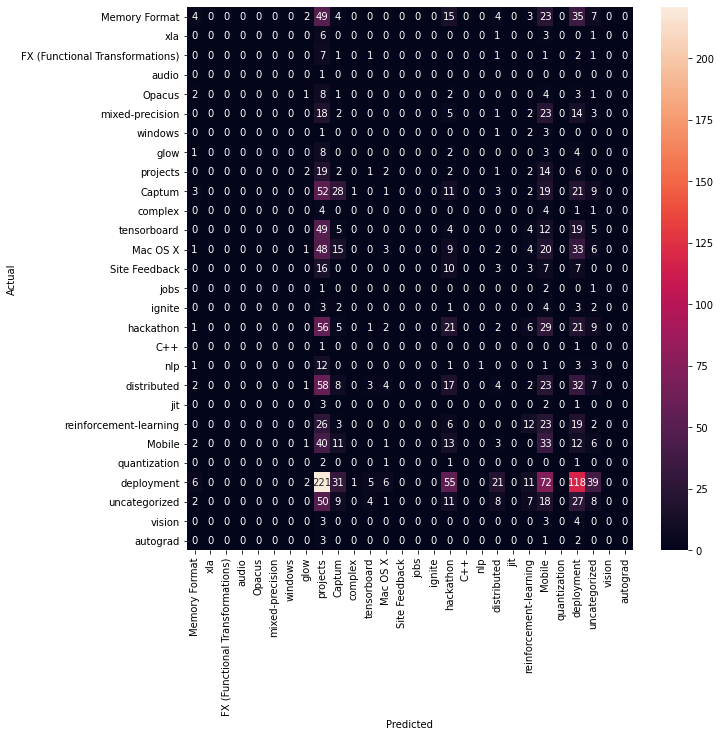

In [260]:
conf_mat = confusion_matrix(y_test, predicted_LGBM)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Other: Investigating AbbreviationS

In [261]:
data = pd.read_csv('Pytorch_Community_Scraped_Data_7059posts_new.csv')

In [262]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDSv2 = [word.upper() for word in STOPWORDS]

In [263]:
STOPWORDSv2

["WEREN'T",
 'THEY',
 "IT'S",
 'THERE',
 'SHOULD',
 'DOES',
 'OURSELVES',
 "WASN'T",
 'DO',
 'MUSTN',
 'OUR',
 'HAVING',
 'UNTIL',
 'WITH',
 'HOW',
 'WILL',
 'SHOULDN',
 "SHOULD'VE",
 'A',
 "DON'T",
 'ANY',
 'YOURSELVES',
 'YOURS',
 'AT',
 'AN',
 'THESE',
 'AGAINST',
 'INTO',
 'YOU',
 'AREN',
 'YOUR',
 'HER',
 'VERY',
 'AIN',
 'UP',
 'DIDN',
 'IT',
 'TO',
 'HASN',
 'SO',
 'DOESN',
 'MIGHTN',
 'HE',
 "SHOULDN'T",
 'AGAIN',
 'IF',
 'FEW',
 'ISN',
 'SHE',
 'EACH',
 'BUT',
 'ABOVE',
 "MIGHTN'T",
 'BEING',
 'HAS',
 'THAT',
 "WOULDN'T",
 'HERSELF',
 'WHOM',
 'WAS',
 'WHERE',
 'OVER',
 'OF',
 "DOESN'T",
 'BECAUSE',
 'OWN',
 "NEEDN'T",
 'I',
 'THIS',
 'AM',
 'BETWEEN',
 'THAN',
 "YOU'VE",
 'NO',
 'OTHER',
 'SAME',
 'M',
 "AREN'T",
 'HIS',
 'HERS',
 'ON',
 "WON'T",
 'ABOUT',
 'SHAN',
 'SOME',
 "YOU'LL",
 'NOW',
 "MUSTN'T",
 'VE',
 'FROM',
 "HAVEN'T",
 'S',
 'ARE',
 'ITS',
 'WHICH',
 'MOST',
 'THEMSELVES',
 'BEEN',
 'AND',
 'HAVEN',
 "ISN'T",
 'Y',
 'D',
 'DOING',
 'DID',
 'NEEDN',
 'WHEN',
 'MY

In [264]:
data

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,0,About the FAQ category,FAQ,[],The FAQ category contains commonly-asked quest...,[],0,0,0,0
1,1,Vscode debug from python step into c++,FAQ,[],I am using vscode to debug pytorch internals i...,[],0,0,0,0
2,2,Why are my tensor’s gradients unexpectedly Non...,FAQ,[],tl;dr\nEnsure that\n\ntensor.is_leaf == True\n...,[],0,0,0,0
3,3,How to measure execution time in PyTorch?,FAQ,[],tl;dr\nThe recommended profiling methods are:\...,[],0,0,0,0
4,4,Time/Memory keeps increasing at every iteration,FAQ,[],How are you measuring time?\nIf each new itera...,[],0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7055,7055,RuntimeError due to inplace operation,autograd,[],I’m still trying to wrap my head around PyTorc...,"['The error you had before the present one, na...",2/22/2021 7:12,3,118,5
7056,7056,Gradient of FC with respect to each sample in ...,autograd,[],I want to get gradient of FC layer of network ...,['autograd automatically condenses the gradien...,2/26/2021 13:02,0,75,1
7057,7057,The second order derivative of a function with...,autograd,[],"Hi,\nI have a question about the second order ...","['Hi,\nThe problem is that your function is li...",2/25/2021 23:24,2,100,3
7058,7058,.grad attribute of a non-leaf tensor being acc...,autograd,[],"Hi there, im a newbie at pytorch.\nI am runnin...","['Hi,\nThis warning only means that you are ac...",5/21/2020 8:42,9,6.7k,9


In [267]:
def clean_data(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = ' '.join(word for word in text.split() if word not in STOPWORDSv2) # delete stopwors from text
    return text
       
data['Leading Post'] = data['Leading Post'].apply(lambda x: clean_data(str(x)))

In [268]:
data['Leading Post']

0       The FAQ category contains commonly-asked quest...
1       am using vscode to debug pytorch internals in ...
2       tl;dr Ensure that tensor.is_leaf == True tenso...
3       tl;dr The recommended profiling methods are: t...
4       How are you measuring time? If each new iterat...
                              ...                        
7055    I’m still trying to wrap my head around PyTorc...
7056    want to get gradient of FC layer of network wi...
7057    Hi, have a question about the second order der...
7058    Hi there, im a newbie at pytorch. am running i...
7059    Hello, I’d like to know how to properly implem...
Name: Leading Post, Length: 7060, dtype: object

In [269]:
upcase_words = {}
regex = r"([A-Z]{3})"

for i, row in zip(range(500), data['Leading Post'][:500]):
    row = data['Leading Post'].str.findall(regex)[i]
    if len(row) != 0:
        upcase_words[i] = row

In [270]:
df_upword = pd.DataFrame(upcase_words.items(), columns=['Original Index', 'Upper Case Words'])

In [271]:
df_upword.head()

,Original Index,Upper Case Words
0,0,"[FAQ, FAQ]"
1,1,"[USE, CUD, REL, WIT, DEB, INF, DEB]"
2,3,"[API, API, CPU, CPU, CUD, GPU, GPU]"
3,4,"[GPU, RNN, AVO, FAQ, CPU, GPU]"
4,7,"[GPU, GPU]"


In [272]:
df_upword['Number of UpCase Words'] =  df_upword['Upper Case Words'].apply(lambda x: len(x))

In [273]:
df_upword.head()

,Original Index,Upper Case Words,Number of UpCase Words
0,0,"[FAQ, FAQ]",2
1,1,"[USE, CUD, REL, WIT, DEB, INF, DEB]",7
2,3,"[API, API, CPU, CPU, CUD, GPU, GPU]",7
3,4,"[GPU, RNN, AVO, FAQ, CPU, GPU]",6
4,7,"[GPU, GPU]",2


In [274]:
df_upword['Number of UpCase Words'].values.max()

1245

In [276]:
df_upword['Number of UpCase Words'][df_upword['Number of UpCase Words'].values == 1245]

236    1245
Name: Number of UpCase Words, dtype: int64

In [277]:
df_upword['Number of UpCase Words'][236]

1245

In [278]:
df_upword['Upper Case Words'][236]

['DNN',
 'GPU',
 'RTX',
 'MAG',
 'HOM',
 'LIB',
 'CMA',
 'GEN',
 'ERA',
 'TOR',
 'TOR',
 'CUD',
 'ARC',
 'LIS',
 'CMA',
 'INC',
 'LUD',
 'PAT',
 'RTX',
 'CUD',
 'DBU',
 'ILD',
 'PYT',
 'HON',
 'DBU',
 'ILD',
 'TES',
 'DCM',
 'AKE',
 'BUI',
 'TYP',
 'DCM',
 'AKE',
 'GEN',
 'ERA',
 'TOR',
 'DCM',
 'AKE',
 'INC',
 'LUD',
 'PAT',
 'TAI',
 'MLA',
 'DCM',
 'AKE',
 'INS',
 'TAL',
 'PRE',
 'FIX',
 'TAI',
 'MLA',
 'DCM',
 'AKE',
 'PRE',
 'FIX',
 'PAT',
 'DCU',
 'DNN',
 'LIB',
 'RAR',
 'NVI',
 'DIA',
 'GPU',
 'CUD',
 'DNU',
 'MPY',
 'INC',
 'LUD',
 'DIR',
 'DPY',
 'THO',
 'EXE',
 'CUT',
 'ABL',
 'DPY',
 'THO',
 'INC',
 'LUD',
 'DIR',
 'DPY',
 'THO',
 'LIB',
 'RAR',
 'DTO',
 'RCH',
 'BUI',
 'VER',
 'SIO',
 'DUS',
 'NUM',
 'TAI',
 'MLA',
 'CXX',
 'MSV',
 'MSV',
 'CXX',
 'ABI',
 'CXX',
 'ABI',
 'CXX',
 'MSV',
 'CXX',
 'CXX',
 'ABI',
 'ABI',
 'MSV',
 'BLA',
 'COM',
 'PIL',
 'WOR',
 'COM',
 'PIL',
 'WOR',
 'SUP',
 'POR',
 'GLI',
 'BCX',
 'USE',
 'SUP',
 'POR',
 'GLI',
 'BCX',
 'USE',
 'CAF',
 'EXC',


In [279]:
abb = {}
for word in df_upword['Upper Case Words'][236]:
    if word in abb.keys():
        abb[word] += 1
    else:
        abb[word] = 1